<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/113_DOE_Taguchi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023**

# **Parte I: CAPÍTULO 9 Introducción al diseño robusto (Taguchi) - Humberto Gutierrez - Román de la Vara. Ejemplo 9.4, pág. 314**
## **1. Ejemplo integrador**



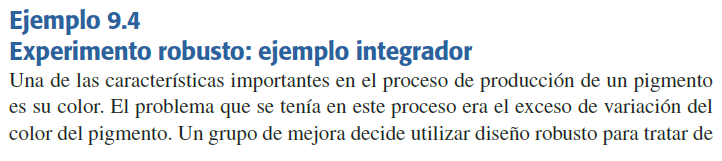

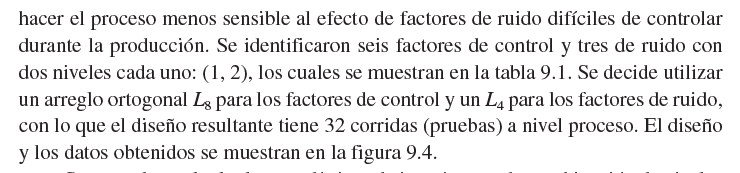

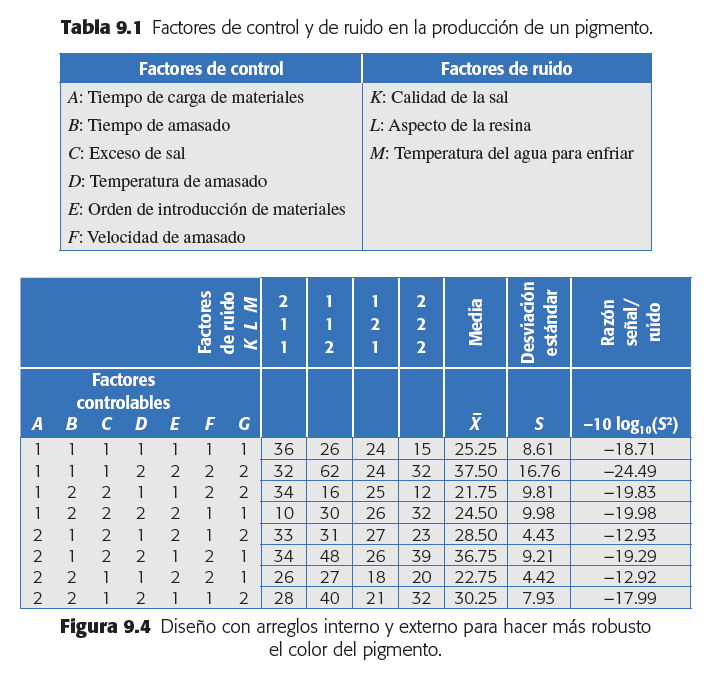


## **2. Librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Datos**

In [10]:
import pandas as pd

data = {
    'A': [1, 1, 1, 1, 2, 2, 2, 2],
    'B': [1, 1, 2, 2, 1, 1, 2, 2],
    'C': [1, 1, 2, 2, 2, 2, 1, 1],
    'D': [1, 2, 1, 2, 1, 2, 1, 2],
    'E': [1, 2, 1, 2, 2, 1, 2, 1],
    'F': [1, 2, 2, 1, 1, 2, 2, 1],
    'G': [1, 2, 2, 1, 2, 2, 1, 2],
    'media' :      [25.25, 37.50, 21.75, 24.50, 28.50, 36.75, 22.75, 30.25],
'desviacion':      [ 8.61, 16.76,  9.81,  9.98,  4.43,  9.21,  4.42,  7.93],
'nominal_mejor2':[-18.71, -24.49,  -19.83, -19.98, -12.93, -19.29, -12.92, -17.99]
}




## **4. Nuestro DataFrame**

In [11]:
datos = pd.DataFrame(data)
print(datos)

   A  B  C  D  E  F  G  media  desviacion  nominal_mejor2
0  1  1  1  1  1  1  1  25.25        8.61          -18.71
1  1  1  1  2  2  2  2  37.50       16.76          -24.49
2  1  2  2  1  1  2  2  21.75        9.81          -19.83
3  1  2  2  2  2  1  1  24.50        9.98          -19.98
4  2  1  2  1  2  1  2  28.50        4.43          -12.93
5  2  1  2  2  1  2  2  36.75        9.21          -19.29
6  2  2  1  1  2  2  1  22.75        4.42          -12.92
7  2  2  1  2  1  1  2  30.25        7.93          -17.99


# **5. Efectos Principales**
## **a. Se toman los niveles del factor que maximizan la señal ruido**

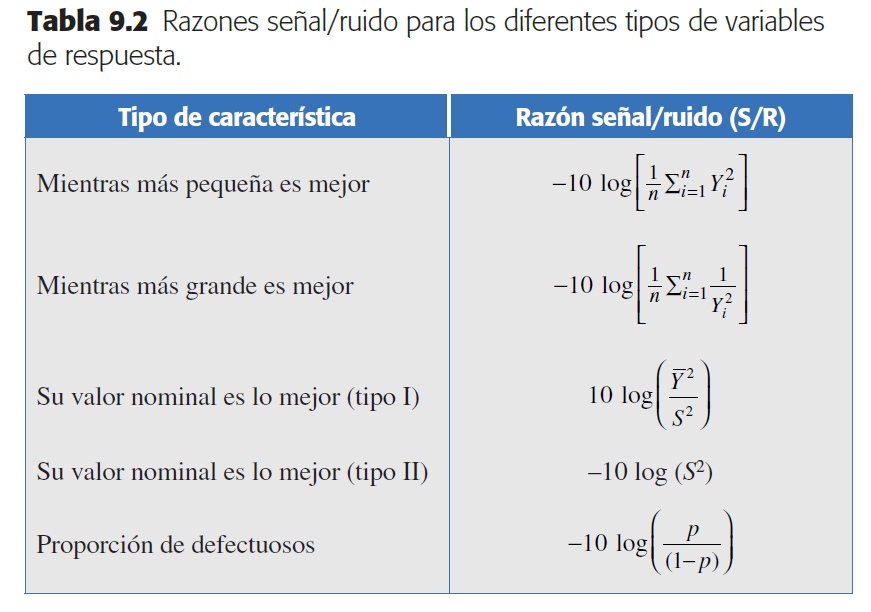

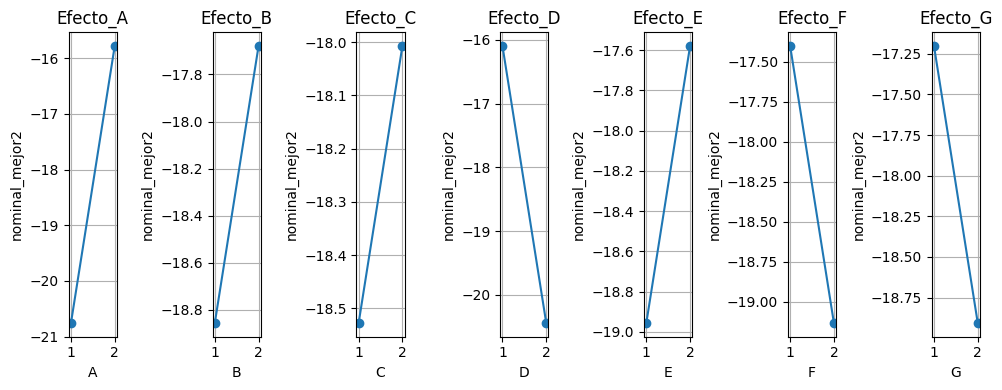

In [12]:

# Crear gráficos de efectos principales para cada factor en una sola fila
factors = datos.columns[:-3]  # Excluyendo la columna 'media' y 'desviacion

fig, axes = plt.subplots(1, len(factors), figsize=(10, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'nominal_mejor2']].groupby(factor).mean()
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('nominal_mejor2')
    ax.set_title(f'Efecto_{factor}')
    ax.grid(True)

plt.tight_layout()
plt.show()


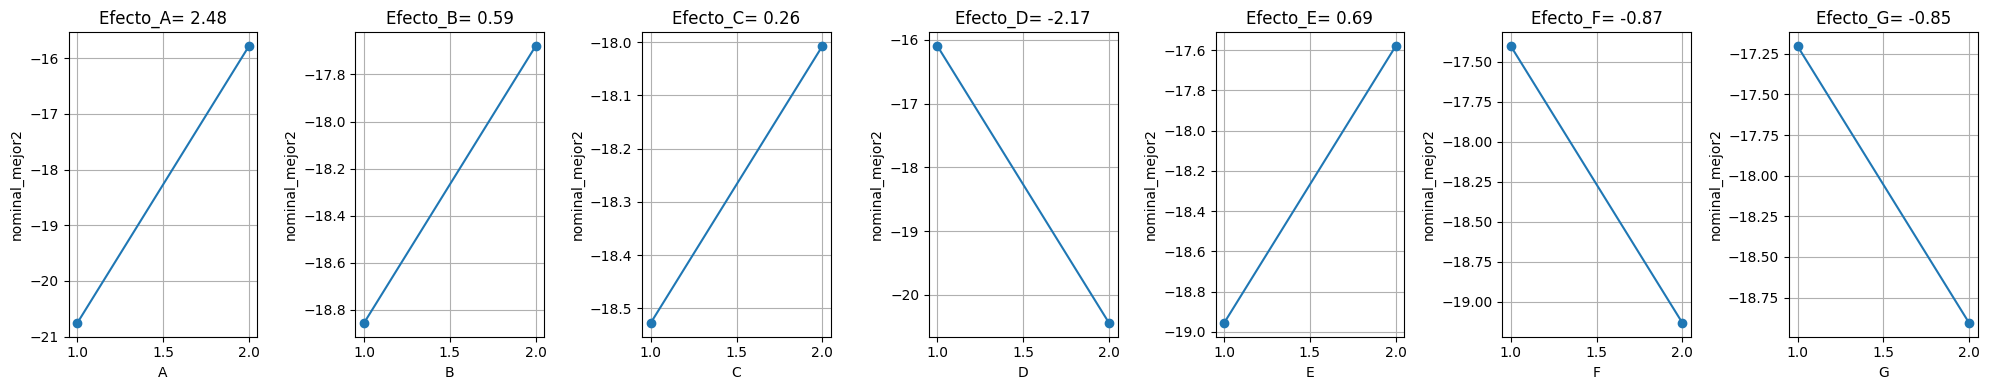

In [15]:
import matplotlib.pyplot as plt

factors = datos.columns[:-3]  # Excluyendo la columna 'rendimiento'

fig, axes = plt.subplots(1, len(factors), figsize=(20, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'nominal_mejor2']].groupby(factor).mean()
    effect_value = (df_effect.loc[2, 'nominal_mejor2'] - df_effect.loc[1, 'nominal_mejor2'])/2  # Cálculo del efecto
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('nominal_mejor2')
    ax.set_title(f'Efecto_{factor}= {effect_value:.2f}')
    ax.grid(True)

plt.tight_layout()
plt.show()


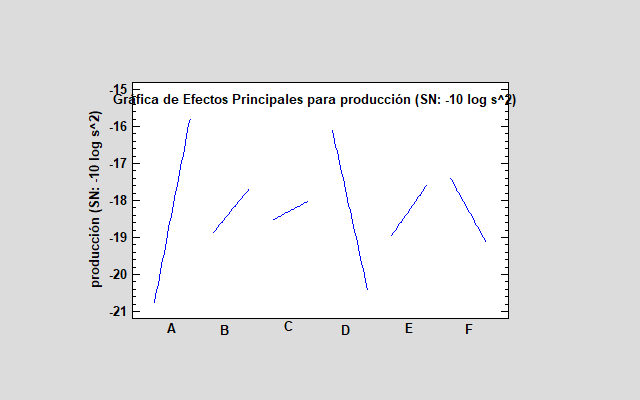

## **b. Se toman los niveles del Factor que Maximizan la Media**

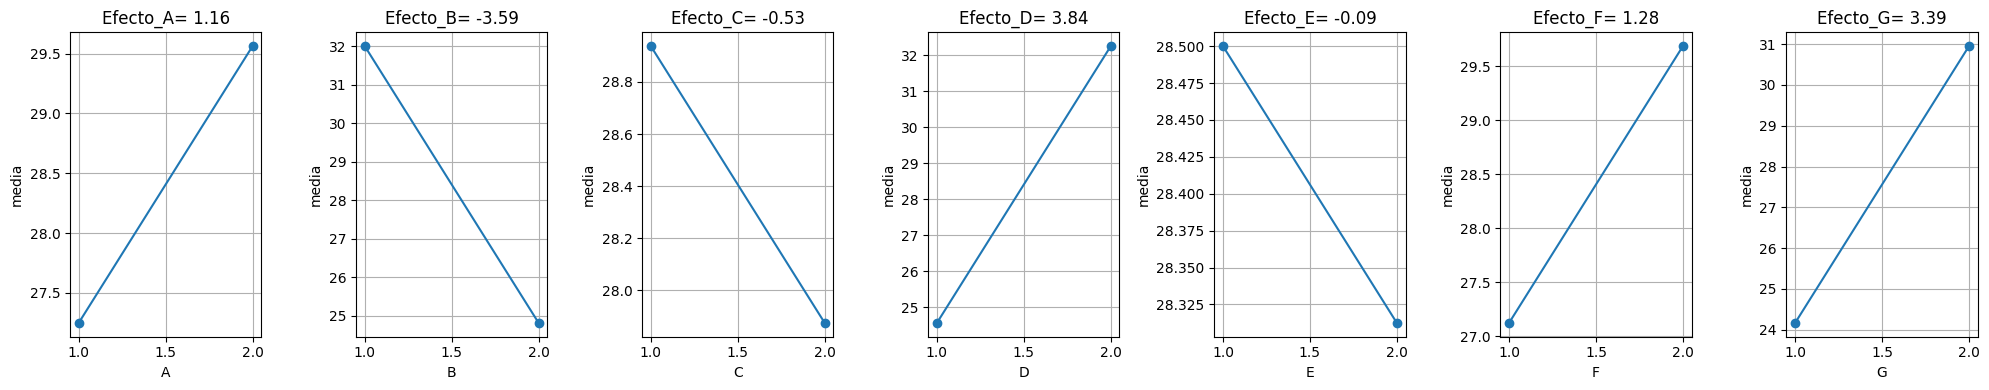

In [16]:
import matplotlib.pyplot as plt

factors = datos.columns[:-3]  # Excluyendo la columna 'rendimiento'

fig, axes = plt.subplots(1, len(factors), figsize=(20, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'media']].groupby(factor).mean()
    effect_value = (df_effect.loc[2, 'media'] - df_effect.loc[1, 'media'])/2  # Cálculo del efecto
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('media')
    ax.set_title(f'Efecto_{factor}= {effect_value:.2f}')
    ax.grid(True)

plt.tight_layout()
plt.show()


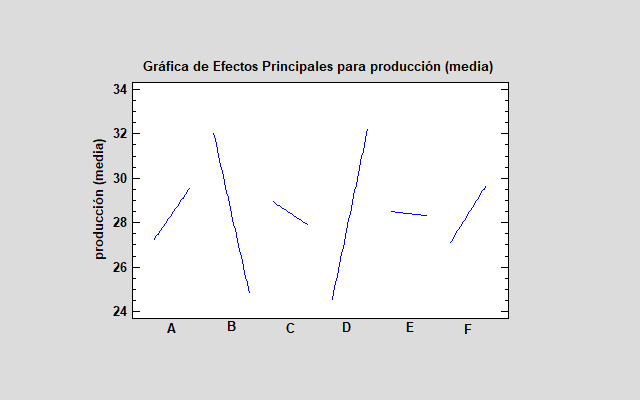

# **6. BoxPlot para la media**

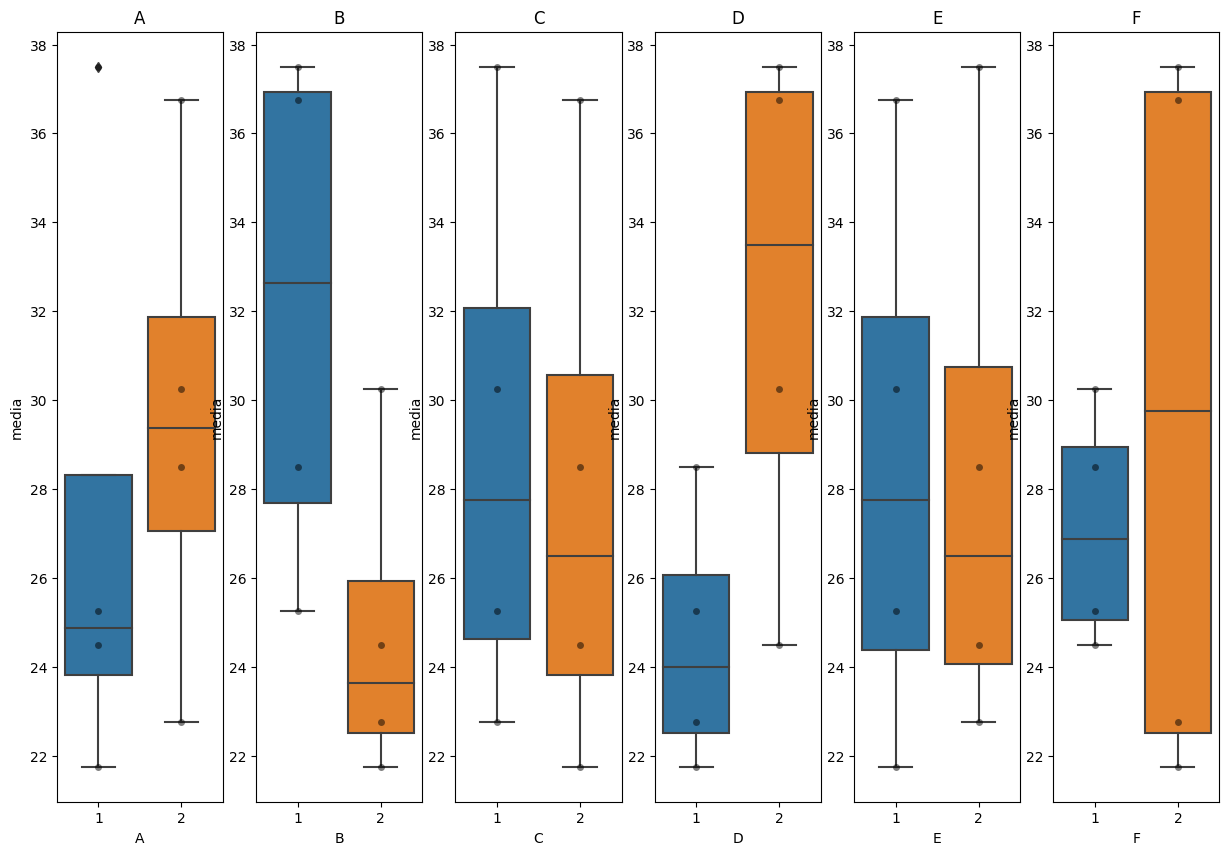

In [18]:
fig, axs = plt.subplots(1, 6, figsize=(15, 10))
axs[0].set_title('A')
sns.boxplot(x="A", y="media", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('B')
sns.boxplot(x="B", y="media", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('C')
sns.boxplot(x="C", y="media", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('D')
sns.boxplot(x="D", y="media", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[3])

axs[4].set_title('E')
sns.boxplot(x="E", y="media", data=datos, ax=axs[4])
sns.swarmplot(x="E", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[4])

axs[5].set_title('F')
sns.boxplot(x="F", y="media", data=datos, ax=axs[5])
sns.swarmplot(x="F", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[5]);


# **7. BoxPlot para la señal - ruido**

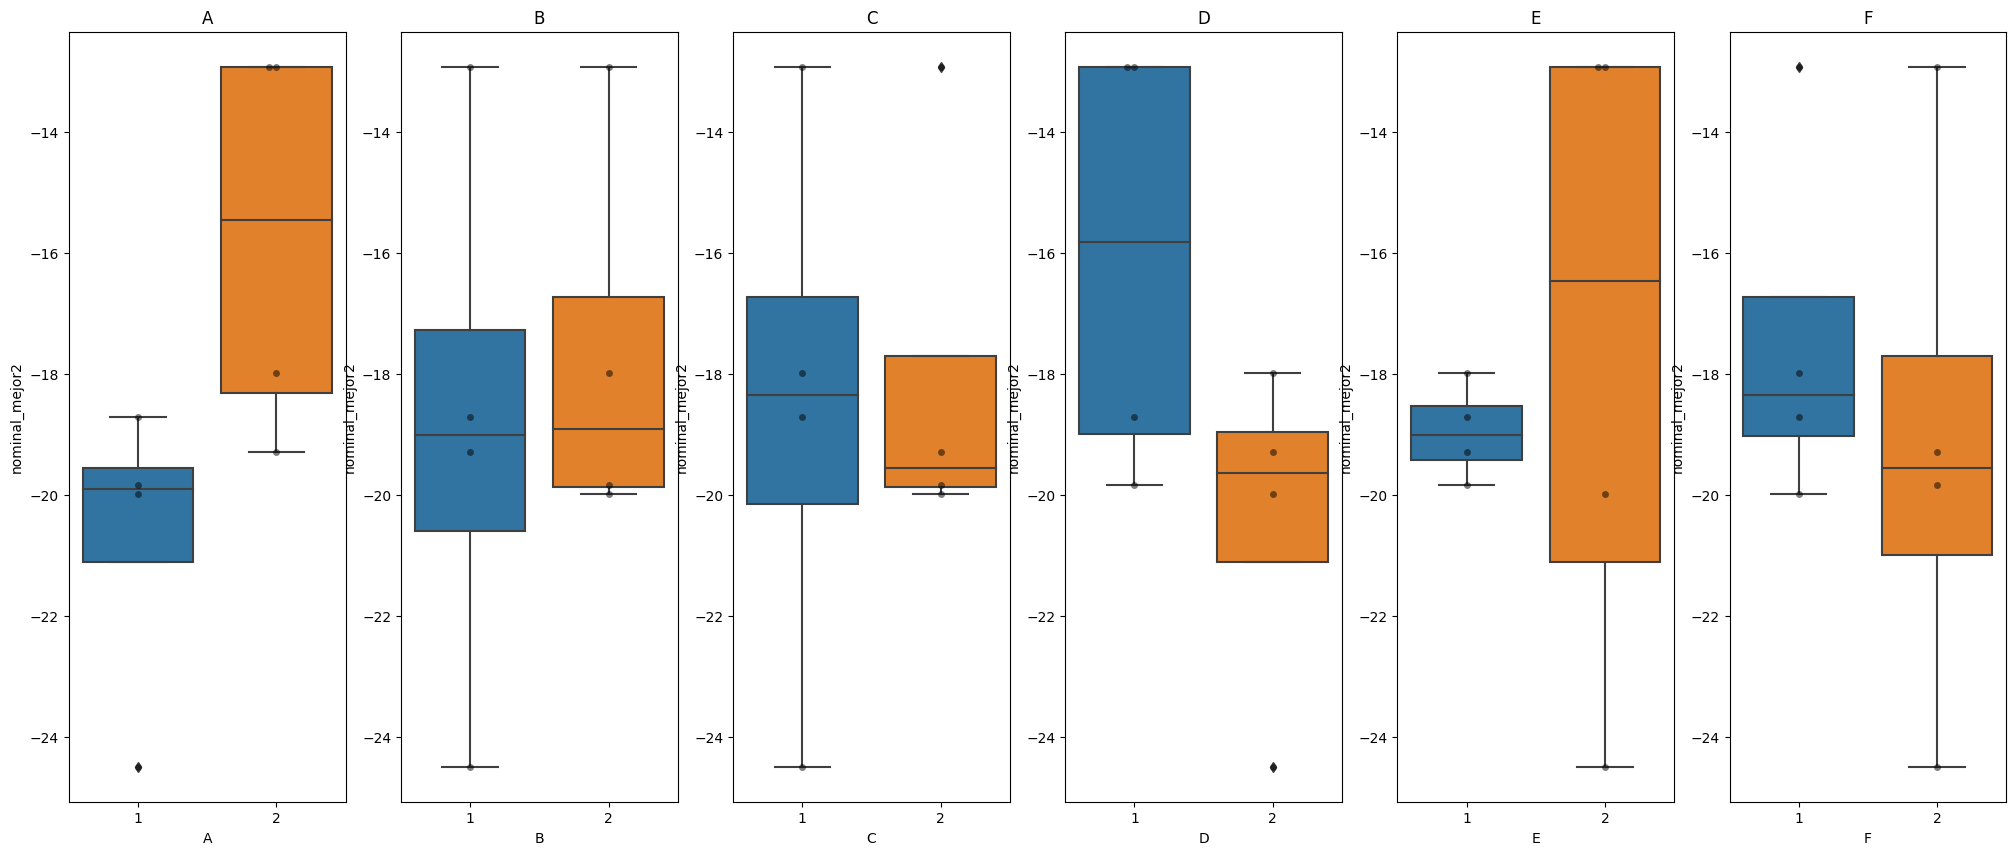

In [22]:
fig, axs = plt.subplots(1, 6, figsize=(25, 10))
axs[0].set_title('A')
sns.boxplot(x="A", y="nominal_mejor2", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('B')
sns.boxplot(x="B", y="nominal_mejor2", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('C')
sns.boxplot(x="C", y="nominal_mejor2", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('D')
sns.boxplot(x="D", y="nominal_mejor2", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[3])

axs[4].set_title('E')
sns.boxplot(x="E", y="nominal_mejor2", data=datos, ax=axs[4])
sns.swarmplot(x="E", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[4])

axs[5].set_title('F')
sns.boxplot(x="F", y="nominal_mejor2", data=datos, ax=axs[5])
sns.swarmplot(x="F", y="nominal_mejor2", data=datos, color='black',
              alpha = 0.5, ax=axs[5]);


In [24]:
from statsmodels.graphics.factorplots import interaction_plot

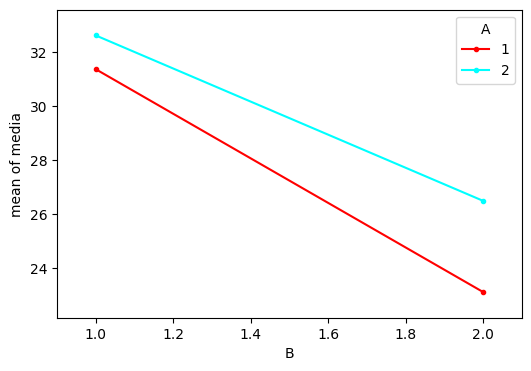

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.A,
    response = datos.media,
    ax       = ax,
)

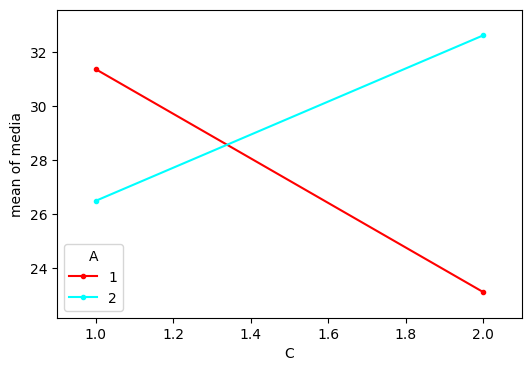

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.C,
    trace    = datos.A,
    response = datos.media,
    ax       = ax,
)

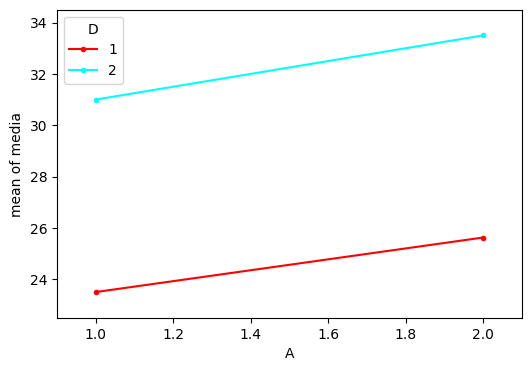

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.D,
    response = datos.media,
    ax       = ax,
)

# **8. No es posible el anova con todos los efectos**

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **a. Anova con los Efectos Principales**

In [30]:
modelo1 = ols("media ~ (A+B+C+D+E+F)", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df      sum_sq     mean_sq          F    PR(>F)
A         1.0   10.695313   10.695313   1.117551  0.482321
B         1.0  103.320312  103.320312  10.795918  0.188083
C         1.0    2.257812    2.257812   0.235918  0.712150
D         1.0  118.195313  118.195313  12.350204  0.176487
E         1.0    0.070312    0.070312   0.007347  0.945566
F         1.0   13.132813   13.132813   1.372245  0.449845
Residual  1.0    9.570312    9.570312        NaN       NaN


In [31]:
modelo2 = sm.OLS.from_formula("media ~ (A+B+C+D+E+F)", data = datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     4.313
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.353
Time:                        19:54:01   Log-Likelihood:                -12.068
No. Observations:                   8   AIC:                             38.14
Df Residuals:                       1   BIC:                             38.69
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2187      8.111      2.739      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **b. Optimización del Modelo con la media**

In [32]:
modelo2.params

Intercept    22.21875
A             2.31250
B            -7.18750
C            -1.06250
D             7.68750
E            -0.18750
F             2.56250
dtype: float64

In [43]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, b1, b2, b3, b4, b5, b6 = modelo2.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b4', b4],
           ['b5',	b5],
           ['b6', b6]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 22.219                       |
+----------------+------------------------------+
| b1             | 2.313                        |
+----------------+------------------------------+
| b2             | -7.187                       |
+----------------+------------------------------+
| b3             | -1.062                       |
+----------------+------------------------------+
| b4             | 7.687                        |
+----------------+------------------------------+
| b5             | -0.187                       |
+----------------+------------------------------+
| b6             | 2.563                        |
+----------------+------------------------------+


In [44]:
from scipy.optimize import minimize

# Define la función que deseas minimizar se antepone el signo (-)
def funcion(x):
    return -(b0+b1*x[0] + b2*x[1] + b3*x[2] + b4*x[3]+ b5*x[4] + b6*x[5])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4], x[5]

# Definir las restricciones de límite para x
restricciones = [(1,  2), (1,  2), (1,  2), (1,  2), (1,  2), (1,  2)]

# Suprimir la salida de la optimización
res = minimize(funcion, [1, 1, 1, 1, 1, 1], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print(f'función a optimizar es f = {round(b0,3)}+{round(b1,3)}A+{round(b2,3)}B+{round(b3,3)}C+{round(b4,3)}D +{round(b5,3)}E+{round(b6,3)}F')
print("x:", res.x)
print("Valor Máximo:", -res.fun)


Resultado óptimo:
función a optimizar es f = 22.219+2.313A+-7.187B+-1.062C+7.687D +-0.187E+2.563F
x: [2. 1. 1. 2. 1. 2.]
Valor Máximo: 38.906249999999815


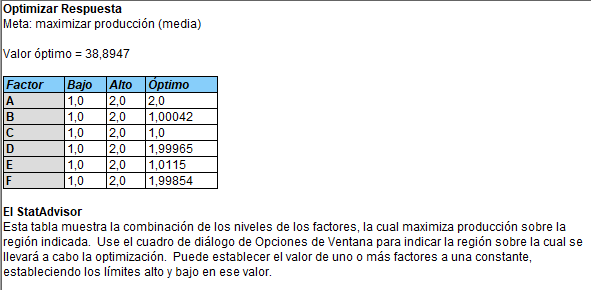

# **c. Optimizacion del Modelo con la señal ruido**

In [45]:
modelo3 = sm.OLS.from_formula("nominal_mejor2 ~ (A+B+C+D+E+F)", data = datos).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:         nominal_mejor2   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     7.089
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.280
Time:                        20:07:46   Log-Likelihood:                -6.4590
No. Observations:                   8   AIC:                             26.92
Df Residuals:                       1   BIC:                             27.47
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.2225      4.023     -5.275      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
modelo3.params

Intercept   -21.2225
A             4.9700
B             1.1750
C             0.5200
D            -4.3400
E             1.3750
F            -1.7300
dtype: float64

In [47]:
t4 = Texttable()
b0, A1, B2, C3, D4, E5, F6 = modelo3.params
# Tabla Resumen

t4.add_rows([['Parametro = bi','valor de bi para el modelo 3' ],
           ['b0',	b0],
           ['A1',	A1],
           ['B2',	B2],
           ['C3',	C3],
           ['D4',	D4],
           ['E5', E5],
           ['F6', F6]
           ])
print(t4.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 3 |
+================+==============================+
| b0             | -21.222                      |
+----------------+------------------------------+
| A1             | 4.970                        |
+----------------+------------------------------+
| B2             | 1.175                        |
+----------------+------------------------------+
| C3             | 0.520                        |
+----------------+------------------------------+
| D4             | -4.340                       |
+----------------+------------------------------+
| E5             | 1.375                        |
+----------------+------------------------------+
| F6             | -1.730                       |
+----------------+------------------------------+


In [48]:
from scipy.optimize import minimize

# Define la función que deseas minimizar se antepone el signo (-)
def funcion(x):
    return -(b0+A1*x[0] + B2*x[1] + C3*x[2] + D4*x[3] + E5*x[4] +F6*x[5])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4], x[5]

# Definir las restricciones de límite para x
restricciones = [(1,  2), (1,  2), (1,  2), (1,  2), (1,  2), (1,  2)]

# Suprimir la salida de la optimización
res = minimize(funcion, [2, 2, 2, 2, 2, 2], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print(f'función a optimizar es f = {round(b0,3)}+{round(A1,3)}A+{round(B2,3)}B+{round(C3,3)}C+{round(D4,3)}D +{round(E5,3)}E+{round(F6,3)}F')
print("x:", res.x)
print("Valor Máximo:", -res.fun)


Resultado óptimo:
función a optimizar es f = -21.222+4.97A+1.175B+0.52C+-4.34D +1.375E+-1.73F
x: [2. 2. 2. 1. 2. 1.]
Valor Máximo: -11.212499999999999


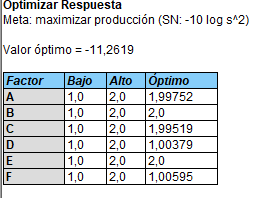

# **9.0 Aplicando la Metodologia de Taguchi correctamente**

In [53]:
# Define las funciones f(x, y, z) y g(x, y, z)
def media(A, B, C, D, E, F):
    return 22.219 + 2.313*A -7.187*B-1.062*C+7.687*D -0.187*E+2.563*F

def señal(A, B, C, D, E, F):
    return -21.222 + 4.97*A + 1.175*B + 0.52*C -4.34*D + 1.375*E-1.73*F

# Puntos en los que deseas evaluar las funciones
punto1 = [2, 1, 1, 2, 1, 2] # Punto analitico no pertenece a la configuración L_8
punto2 = [2, 1, 2, 1, 2, 1] # Punto Observado si pertenece a la configuración L_8

# Evalúa las funciones en los puntos
resultado1_f = media(punto1[0], punto1[1], punto1[2], punto1[3], punto1[4], punto1[5])
resultado1_g = señal(punto1[0], punto1[1], punto1[2], punto1[3], punto1[4], punto1[5])

resultado2_f = media(punto2[0], punto2[1], punto2[2], punto2[3], punto2[4], punto2[5])
resultado2_g = señal(punto2[0], punto2[1], punto2[2], punto2[3], punto2[4], punto2[5])

# Imprime los resultados
print("Resultados en el punto1 =  [2, 1, 1, 2, 1, 2] obtenido con Analíticamente:")
print("media =", resultado1_f)
print("señal =", resultado1_g)

print("\nResultados en el punto2 = [2, 1, 2, 1, 2, 1] obtenido con Taguchi:")
print("media =", resultado2_f)
print("señal =", resultado2_g)


Resultados en el punto1 =  [2, 1, 1, 2, 1, 2] obtenido con Analíticamente:
media = 38.909
señal = -20.352000000000004

Resultados en el punto2 = [2, 1, 2, 1, 2, 1] obtenido con Taguchi:
media = 27.410000000000004
señal = -12.387
